In [1]:
from os.path import join as pjoin
from nilearn.image import load_img, new_img_like, math_img
from nilearn import plotting
import numpy as np
import matplotlib.pyplot as plt

num_states = 6
project = "/home/joyneelm/emoprox2_slds_bootstrap_resamples"
nii_dir = "/home/joyneelm/emoprox2_slds_bootstrap_resamples/rSLDS_state_regressors/rslds_K6_D10_N85_92subjs_emoprox_5"

5.808214802448449 1.0 0.0 132904.0
5.808214802448449 1.0 0.0 128519.0
5.808214802448449 1.0 0.0 79747.0
5.808214802448449 1.0 0.0 111873.0
5.808214802448449 1.0 0.0 101382.0
5.808214802448449 1.0 0.0 50516.0


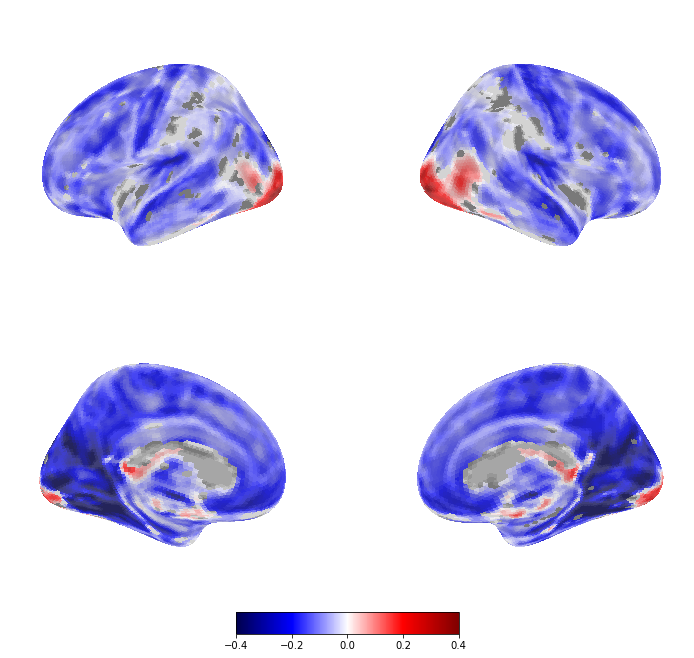

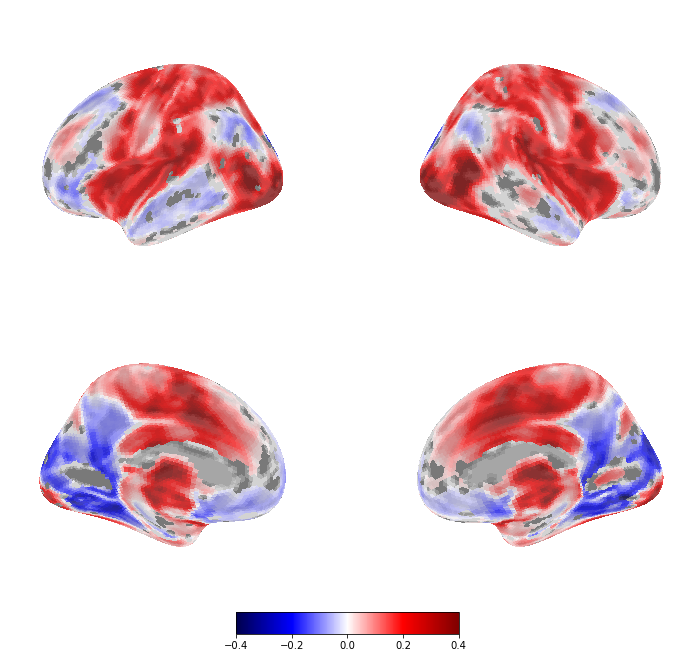

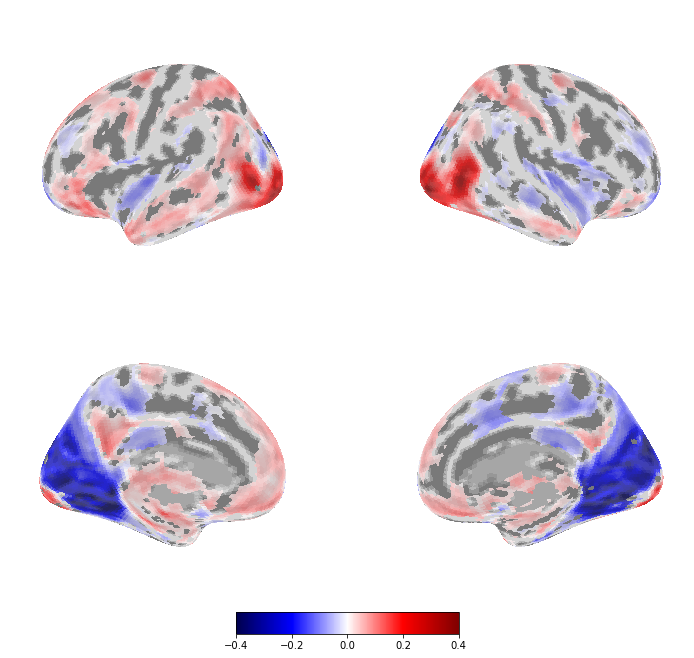

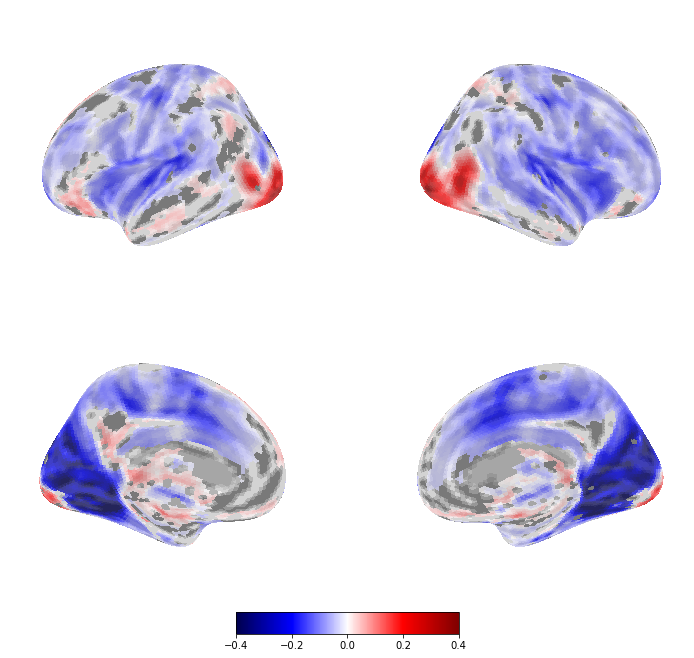

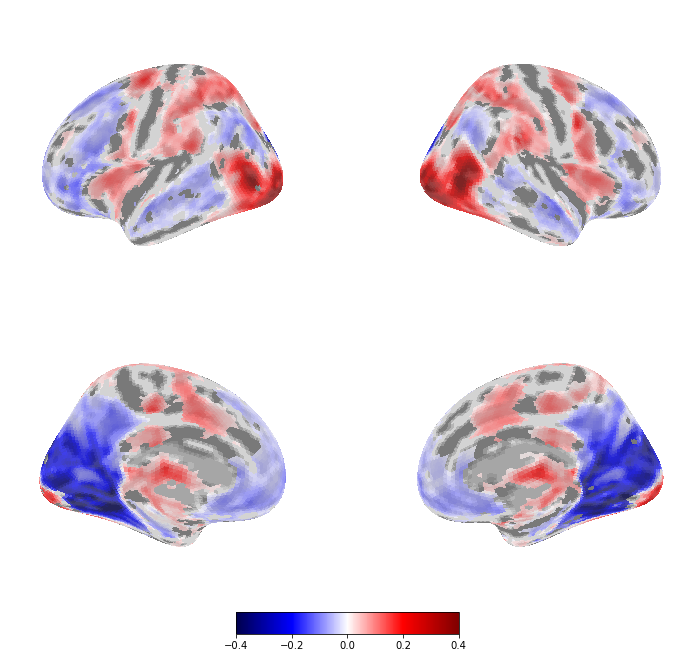

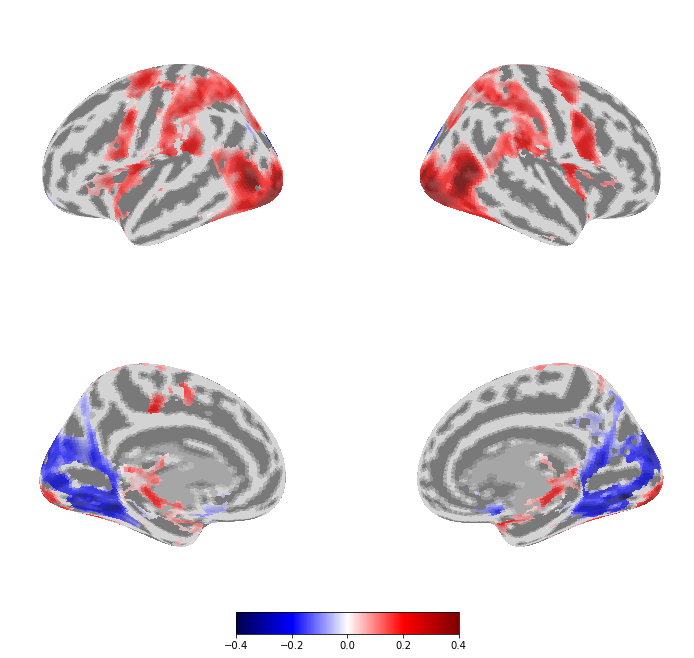

In [3]:
import cmasher as cmr
from nilearn.glm import threshold_stats_img
from nilearn.image import math_img

for contrast in [1,2,3,4,5,6]:
    fname = pjoin("/mnt/sd1/slds", f"state{contrast}.nii.gz")
    img = load_img(fname)
    zmap = new_img_like(
        ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 1]).squeeze()
    )
    zmap_thresh, threshold = threshold_stats_img(
        zmap, alpha=0.001, height_control="bonferroni", cluster_threshold=200
    )
    mask_data = np.array(zmap_thresh.get_fdata()!=0).astype('float')
    print(threshold,mask_data.max(),mask_data.min(),mask_data.sum())
    zmap_mask = new_img_like(ref_niimg=img,data=mask_data)
    cmap = new_img_like(
        ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 0]).squeeze()*mask_data
    )
    fig, ax = plotting.plot_img_on_surf(
        cmap,
        surf_mesh="fsaverage5",
        mask_img=zmap_mask,
        hemispheres=['left','right'],
        bg_on_data=True,
        inflate=True,
        views=['lateral','medial'],
        output_file=None,
        title="",
        colorbar=True,
        vmax=0.4,
        # threshold=0,#threshold,
        symmetric_cbar="auto",
        cmap="seismic",  # cmr.guppy_r,
        colorbar_fontsize=100,
    )
    fig.set_size_inches(10.5, 10.5)
    fig.savefig(
        f"figures/fig_contrast_maps_st{contrast}_K{num_states}.eps",
        dpi=600,
        bbox_inches="tight",
    )
    # fig.savefig(f'figures/fig_contrast_maps_colorbar.png',dpi=600,bbox_inches='tight')

5.808214802448449 1.0 0.0 110546.0


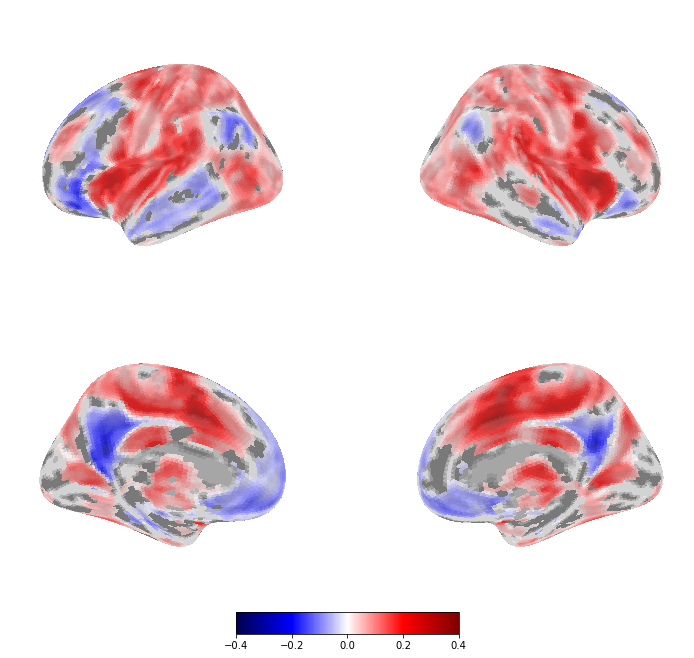

In [5]:
import cmasher as cmr
from nilearn.glm import threshold_stats_img
from nilearn.image import math_img

for contrast in ['54']:
    fname = pjoin("/mnt/sd1/slds", f"state{contrast}.nii.gz")
    img = load_img(fname)
    zmap = new_img_like(
        ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 1]).squeeze()
    )
    zmap_thresh, threshold = threshold_stats_img(
        zmap, alpha=0.001, height_control="bonferroni", cluster_threshold=200
    )
    mask_data = np.array(zmap_thresh.get_fdata()!=0).astype('float')
    print(threshold,mask_data.max(),mask_data.min(),mask_data.sum())
    zmap_mask = new_img_like(ref_niimg=img,data=mask_data)
    cmap = new_img_like(
        ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 0]).squeeze()*mask_data
    )
    fig, ax = plotting.plot_img_on_surf(
        cmap,
        surf_mesh="fsaverage5",
        mask_img=zmap_mask,
        hemispheres=['left','right'],
        bg_on_data=True,
        inflate=True,
        views=['lateral','medial'],
        output_file=None,
        title="",
        # colorbar=True,
        vmax=0.4,
        # threshold=0,#threshold,
        symmetric_cbar="auto",
        cmap="seismic",  # cmr.guppy_r,
        colorbar_fontsize=100,
    )
    fig.set_size_inches(10.5, 10.5)
    fig.savefig(
        f"figures/fig_contrast_maps_st{contrast}_K{num_states}.eps",
        dpi=600,
        bbox_inches="tight",
    )
    # fig.savefig(f'figures/fig_contrast_maps_colorbar.png',dpi=600,bbox_inches='tight')

In [ ]:
# import cmasher as cmr
# from nilearn.glm import threshold_stats_img

# for contrast in [3, 4, 5]:
#     for hemi in ["left", "right"]:
#         for view in ["medial", "lateral"]:
#             fname = pjoin(nii_dir, f"state{contrast}.nii.gz")
#             img = load_img(fname)
#             zmap = new_img_like(
#                 ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 1]).squeeze()
#             )
#             zmap_thresh, threshold = threshold_stats_img(
#                 zmap, alpha=0.01, height_control="bonferroni", cluster_threshold=200
#             )
#             fig, ax = plotting.plot_img_on_surf(
#                 zmap_thresh,
#                 surf_mesh="fsaverage5",
#                 mask_img=None,
#                 hemispheres=[hemi],
#                 bg_on_data=True,
#                 inflate=True,
#                 views=[view],
#                 output_file=None,
#                 title="",
#                 colorbar=False,
#                 vmax=20,
#                 threshold=threshold,
#                 symmetric_cbar="auto",
#                 cmap="seismic",  # cmr.guppy_r,
#                 colorbar_fontsize=100,
#             )
#             fig.set_size_inches(10.5, 10.5)
#             fig.savefig(
#                 f"figures/fig_contrast_maps_st{contrast}_K{num_states}_{hemi}_{view}.png",
#                 dpi=600,
#                 bbox_inches="tight",
#             )
#     # fig.savefig(f'figures/fig_contrast_maps_colorbar.png',dpi=600,bbox_inches='tight')

In [ ]:
# import cmasher as cmr
# from nilearn.glm import threshold_stats_img

# for contrast in ["53", "54", "43"]:
#     for hemi in ["left", "right"]:
#         for view in ["medial", "lateral"]:
#             fname = pjoin(nii_dir, f"state{contrast}.nii.gz")
#             img = load_img(fname)
#             zmap = new_img_like(
#                 ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 1]).squeeze()
#             )
#             zmap_thresh, threshold = threshold_stats_img(
#                 zmap, alpha=0.01, height_control="bonferroni", cluster_threshold=200
#             )
#             fig, ax = plotting.plot_img_on_surf(
#                 zmap_thresh,
#                 surf_mesh="fsaverage5",
#                 mask_img=None,
#                 hemispheres=[hemi],
#                 bg_on_data=True,
#                 inflate=True,
#                 views=[view],
#                 output_file=None,
#                 title="",
#                 colorbar=False,
#                 vmax=20,
#                 threshold=threshold,
#                 symmetric_cbar="auto",
#                 cmap="seismic",  # cmr.guppy_r,
#                 colorbar_fontsize=100,
#             )
#             fig.set_size_inches(10.5, 10.5)
#             fig.savefig(
#                 f"figures/fig_contrast_maps_st{contrast}_K{num_states}_{hemi}_{view}.png",
#                 dpi=600,
#                 bbox_inches="tight",
#             )
#     # fig.savefig(f'figures/fig_contrast_maps_colorbar.png',dpi=600,bbox_inches='tight')

In [ ]:
# import cmasher as cmr
# from nilearn.glm import threshold_stats_img

# for contrast in [1,2,3,4,5]:
#     fname = pjoin(nii_dir, f"state{contrast}.nii.gz")
#     img = load_img(fname)
#     zmap = new_img_like(
#         ref_niimg=img, data=np.array(img.get_fdata()[:, :, :, :, 1]).squeeze()
#     )
#     zmap_thresh, threshold = threshold_stats_img(
#         zmap, alpha=0.01, height_control="bonferroni", cluster_threshold=200
#     )
#     fig, ax = plotting.plot_img_on_surf(
#         zmap_thresh,
#         surf_mesh="fsaverage5",
#         mask_img=None,
#         hemispheres=['left','right'],
#         bg_on_data=True,
#         inflate=True,
#         views=['lateral','medial'],
#         output_file=None,
#         title="",
#         colorbar=False,
#         vmax=20,
#         threshold=threshold,
#         symmetric_cbar="auto",
#         cmap="seismic",  # cmr.guppy_r,
#         colorbar_fontsize=100,
#     )
#     fig.set_size_inches(10.5, 10.5)
#     fig.savefig(
#         f"figures/fig_contrast_maps_st{contrast}_K{num_states}.png",
#         dpi=600,
#         bbox_inches="tight",
#     )
#     # fig.savefig(f'figures/fig_contrast_maps_colorbar.png',dpi=600,bbox_inches='tight')